# Exploring the transformation functions used in the code

March 26, 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

import subprocess as sp
import sys
import os
import glob

from scipy import fftpack

In [8]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

## Extract image data 

In [9]:
data_dir = '/global/project/projectdirs/dasrepo/vpa/cosmogan/data/raw_data/'
fname='raw_train.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape


(17000, 128, 128)

In [10]:
fname='raw_val.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape

(2456, 128, 128)

## Transformation functions

### Pixel intensity histogram

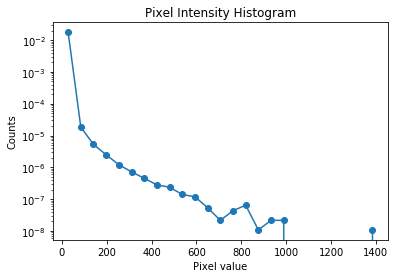

In [25]:
hist=f_pixel_intensity(samples[:100])

/global/homes/v/vpa/.conda/envs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5, 1.0, 'Inv-transform')

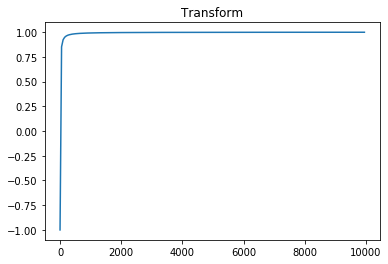

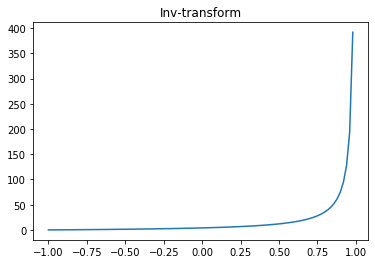

In [45]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4.) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s)

## Transform
plt.figure()
x=np.arange(0,1e4,50)
arr=f_transform(x)
plt.plot(x,arr)
plt.title('Transform')

## Inverse transform
x=np.linspace(-1,1,num=100)
# arr_t=f_transform(x)
arr_inv=f_invtransform(x)

plt.figure()
plt.plot(x,arr_inv)
plt.title('Inv-transform')


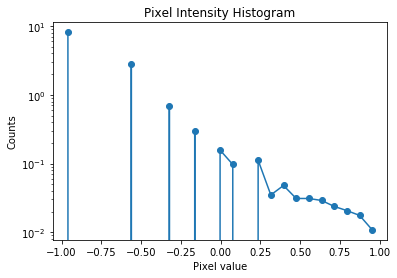

In [29]:
###pixel intensities after transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))

###pixel intensities after inverse transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))


nan

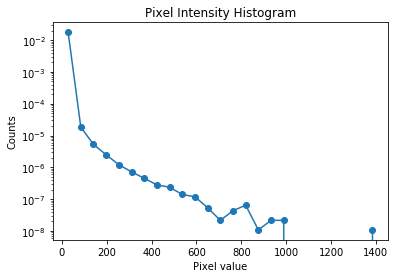

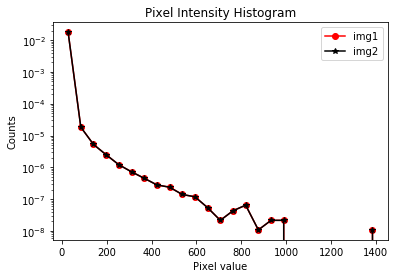

In [47]:
### Comparing array with f_invtransform(f_transform)
f_pixel_intensity(samples[:100])
arr=f_invtransform(f_transform(samples[:100]))
f_compare_pixel_intensity(samples[:100],arr)

## Spectrum

(100, 128, 128) (100, 128, 128) (100, 88) (100, 88)
(88,) (88,)


3.65783741856361e-22

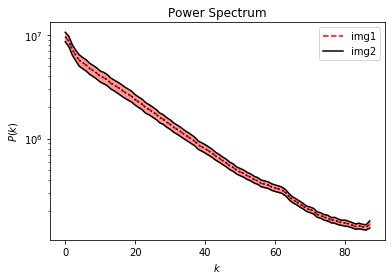

In [48]:
arr=f_invtransform(f_transform(samples[:100]))
f_compare_spectrum(samples[:100],arr)